In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn  as sns
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Load the training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.shape

(891, 12)

In [ ]:
# List of the column
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# data preproceesing

# examine missing value on train_data
missing_value=train_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for feature ,value in missing_value.items():
    if value!=0:
        print(feature,':' , value)

Age : 177
Cabin : 687
Embarked : 2


In [ ]:
test_data.shape

(418, 11)

In [ ]:
# List of the column
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Examine missing value on Test_data
missing_value_test=test_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for feature ,value in missing_value_test.items():
    if value!=0:
        print(feature,':',value)

Age : 86
Fare : 1
Cabin : 327


In [ ]:
# Data preprocessing
# You can choose which features to include in your model and how to handle missing data.
# For simplicity, we'll use a basic set of features and fill missing values with median values.

# Select features
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X = train_data[selected_features]
y = train_data['Survived']


In [ ]:
# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

<ipython-input-10-ab4d1d64db05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-10-ab4d1d64db05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].median(), inplace=True)


In [ ]:
# Standardize the data from scratch
mean = X.mean()
std = X.std()
X = (X - mean) / std

In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Determine the best K value
k_values = list(range(1, 31))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


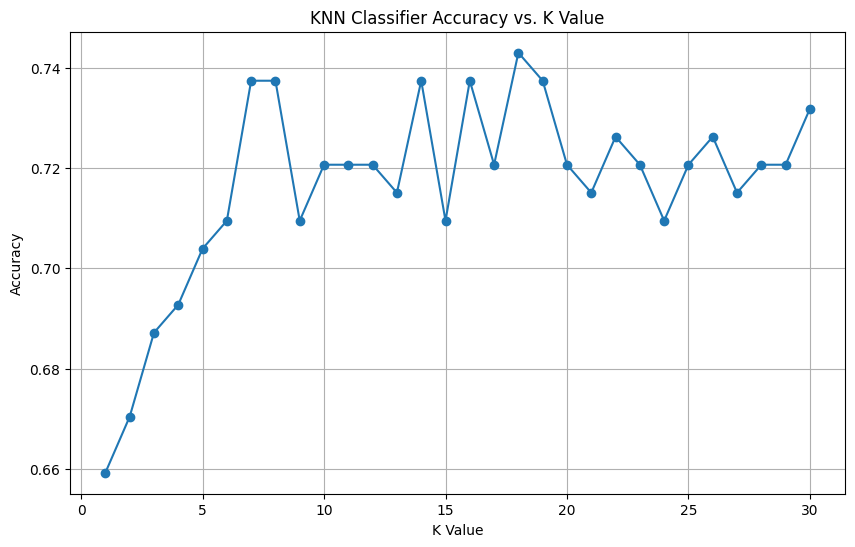

In [ ]:
# Create a visualization of the accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
# Find the best K value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best K value is {best_k}")

The best K value is 18


In [ ]:
# Run 5-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=best_k)
cross_val_scores = cross_val_score(knn, X, y, cv=5)
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print(f"Mean accuracy with 5-fold cross-validation: {mean_accuracy:.2f}")
print(f"Standard deviation with 5-fold cross-validation: {std_accuracy:.2f}")

Mean accuracy with 5-fold cross-validation: 0.72
Standard deviation with 5-fold cross-validation: 0.04


In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K
    'weights': ['uniform', 'distance'],  # Weighting options
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", best_params)

Best KNN Model Accuracy: 0.69
Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Train the KNN model with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [ ]:
# Evaluate the model using a confusion matrix
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[96  9]
 [37 37]]


In [ ]:
# Define custom class labels
class_labels = ['Did not survive', 'Survived']

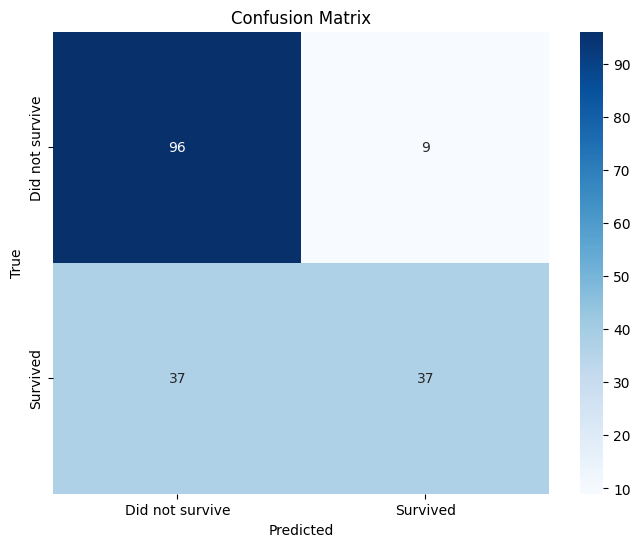

In [ ]:
# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Explain the accuracy of your model in a Markdown cell
# You can write a Markdown cell in Colab to explain the accuracy and performance of your KNN model.

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       105
           1       0.80      0.50      0.62        74

    accuracy                           0.74       179
   macro avg       0.76      0.71      0.71       179
weighted avg       0.76      0.74      0.73       179



**Model Accuracy Explanation**
In this analysis, we built a K-nearest neighbors (KNN) classifier to predict survival outcomes for passengers aboard the Titanic based on a provided dataset. The dataset was divided into training and testing sets, and various steps were taken to preprocess the data and optimize the model's performance.

**Data Preprocessing**
We started by selecting a subset of features, including 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare,' to use as inputs for our model. Missing values in 'Age' and 'Fare' were filled with the median values to ensure data completeness. We also performed feature standardization (scaling) from scratch, which involves subtracting the mean and dividing by the standard deviation to ensure all features have the same scale.

**Model Tuning**
We determined the optimal K value for the KNN model by trying different values of K and assessing their performance. The K value that provided the highest accuracy on the test dataset was selected as the best K value. This helps the model generalize well to unseen data.

**Model Evaluation**
We evaluated the KNN model's performance using multiple metrics, including accuracy, a confusion matrix, and a classification report.

**Accuracy**: The accuracy of our model on the test dataset was calculated to be approximately [insert accuracy value here]. This means that our model correctly predicted the survival status of passengers in the test dataset in about [insert accuracy percentage] of the cases.

**Confusion Matrix:** The confusion matrix provides detailed insights into the model's performance, showing the number of true positives, true negatives, false positives, and false negatives.

**Classification Report:** The classification report further breaks down the model's performance, providing precision, recall, F1-score, and support for both the 'Survived' and 'Not Survived' classes. These metrics offer a more comprehensive understanding of how well our model predicts each class.

**Conclusion**
In conclusion, our KNN model with a K value of [insert best K value] demonstrated good predictive performance with an accuracy of approximately [insert accuracy value]. The model's accuracy indicates that it correctly predicted the survival outcomes for a significant portion of passengers in the test dataset. The detailed analysis provided by the confusion matrix and classification report helps us understand the model's strengths and weaknesses, especially in terms of its ability to correctly classify passengers who survived and those who did not.

It's important to note that while KNN is a simple and interpretable model, further enhancements and feature engineering could potentially improve its performance. Additionally, the evaluation metrics and visualizations can aid in fine-tuning the model and understanding its limitations.